# cutoff=0.01

In [4]:
import pickle
import matplotlib.pyplot as plt
import sys
from kmer_ml.visualization import plot_confidence_interval
import numpy as np

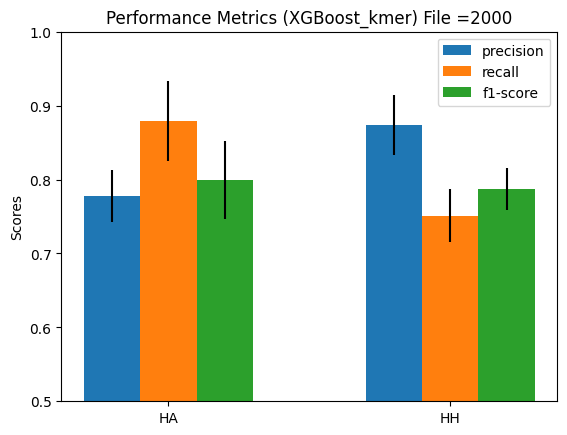

In [5]:
def load_data_from_pickle(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)
    
flag = ['precision', 'recall', 'f1-score']
# Define the correspondence between cut-offs and suffix numbers

filename = f'HAHHresult_kmer_cutoff0.01_file1.pkl'

datasets = load_data_from_pickle(filename)
class_label = datasets['class_label']


tmp = []  # Temporary list to store labels with values <= 1
    
# Extracting keys (labels) from datalabel where the value is <= 1
for k in class_label:
    if class_label.get(k) <= 1:
        tmp.append(k)
key = tmp.copy()
# Re-arranging keys in 'key' dictionary based on values in datalabel
for i in range(len(key)):
    key[class_label[tmp[i]]] = tmp[i]
# for cut_off, suffix in cut_off_to_suffix.items():
#     filename = f'HHAAresult_kmer_cutoff{cut_off}_file-1_2023{suffix}.pkl'
#     datasets[f'{cut_off}_{suffix}'] = load_data_from_pickle(filename)
#     class_label = load_data_from_pickle(filename)['class_label']

# fig, ax = plt.subplots()
width = 0.35
bars_per_dataset = len(flag) * len(key)
group_width = len(flag) * width

report = datasets['kfold_dataset']['report']
report_dataset = plot_confidence_interval(class_label, report)

report_ave = report_dataset['report_ave']
report_low = report_dataset['report_low']
report_up = report_dataset['report_up']

x = np.arange(2)
width = 0.2


fig, ax = plt.subplots()
flag = ['precision', 'recall', 'f1-score']
for i, fg in enumerate(flag):
    vals = [report_ave[name][0][fg][0] for name in key]
    errs = [
        (report_ave[name][0][fg][0] - report_low[name][0][fg][0],
         report_up[name][0][fg][0] - report_ave[name][0][fg][0])  for name in key]
    ax.bar(x + i * width, vals, width, label=fg, yerr=np.transpose(errs))
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics (XGBoost_kmer) File =2000')
ax.set_xticks(x + width)
ax.set_xticklabels(key)
ax.set_ylim([0.5,1])
ax.legend()
plt.savefig('f2000all.png', dpi=300) 
plt.show()

0: TTTTTTGCTAGCGGAAAACGGAGATTTAAAAGAAAACAAAATATTTTTTGCGTA
1: TTTTTTGCTAGCTGAACGTAAAACATTAAATTTCGCTCATTATTATATTATGCT
2: TTTTTTGCTAGGAAGTCGGCAGCCACGCGTAGTGCGCCAGTGCCACCCGGAGTC
3: TTTTTTGCTATAGCAATGGTAGCAGCACCATCCGTACTTAAAAACGCACTAAAT
4: TTTTTTGCTATATGCGGTTTGTAAGATTGATTTTTCTTCTCAAGTTCCTTGTTC
5: TTTTTTGCTATCAAAATGCTACCTCTCCCTTCTTGCAATAAATGACCAAGGCAC
6: TTTTTTGCTATCAATCTTATTGATTTAATTTCATTGCTTAATACTAACTTAATA
7: TTTTTTGCTATCAATGAATTCATTAATTCCTAACTCATTAATTAGATCTGCAAT
8: TTTTTTGCTATCACCGAAAATAGTGCGGATCCCGCATGGTATTTAGGTTTACCC
9: TTTTTTGCTATCAGCCGACGCTGATCGGCGTACCCGCAAATGCTGATTTGCGTT


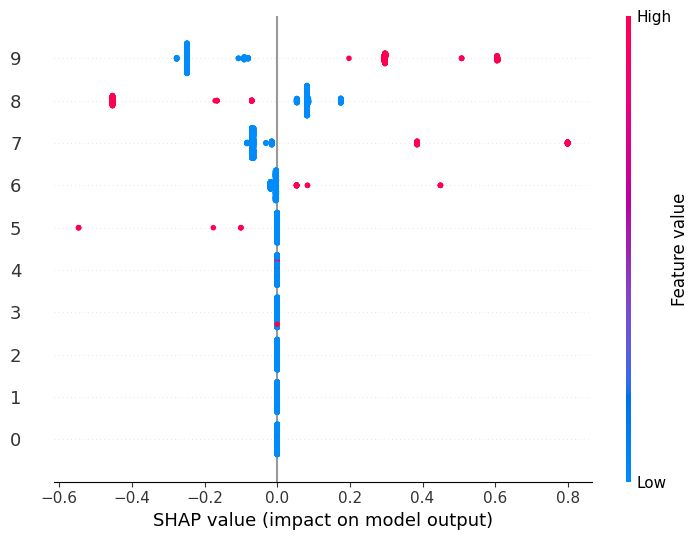

In [28]:
import shap
import pickle
import matplotlib.pyplot as plt
import pandas as pd
with open(filename,'rb') as f:
    re = pickle.load(f)
class_label = re['class_label']
tmp = []  # Temporary list to store labels with values <= 1
    
# Extracting keys (labels) from datalabel where the value is <= 1
for k in class_label:
    if class_label.get(k) <= 1:
        tmp.append(k)
key = tmp.copy()
# Re-arranging keys in 'key' dictionary based on values in datalabel
for i in range(len(key)):
    key[class_label[tmp[i]]] = tmp[i]
shape_value_dataset = re['shape_value_dataset']
shap_values = shape_value_dataset['shap_values']
exp_set = shape_value_dataset['exp_set']
sub_bestfeature_name = shape_value_dataset['sub_bestfeature_name']
sub_bestfeature_indices = shape_value_dataset['sub_bestfeature_indices']
shap.summary_plot(shap_values,  exp_set.toarray(),
                      feature_names=sub_bestfeature_name,
                      class_names=key,
                      #plot_type='violin',
                      show=False)
# Set the y-tick labels as numbers
num_ticks = len(sub_bestfeature_indices)
# plt.yticks( range(num_ticks))

plt.yticks(range(num_ticks), range(num_ticks))

# Print correspondence between numbers and feature names
for i, name in enumerate(sub_bestfeature_name[0:min(10,len(sub_bestfeature_name))]):
    print(f"{i}: {name}")
plt.tight_layout()
plt.show()

In [22]:
print(shap_values[0:3])

[[ 0.08166667 -0.24833333  0.          0.          0.          0.
   0.         -0.07       -0.00333333  0.        ]
 [ 0.08166667 -0.24833333  0.          0.          0.          0.
   0.         -0.07       -0.00333333  0.        ]
 [ 0.08666667  0.3         0.         -0.54666667  0.          0.
   0.         -0.065      -0.015       0.        ]]
